<a href="https://colab.research.google.com/github/stepanjaburek/quantum_social_science_lr/blob/main/colab_pca_cluster_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data wrangling

#Setup

In [ ]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

data = pd.read_csv("/content/0_kw_analysis.csv")
metadata = pd.read_excel("/content/pdf_list(1).xlsx")

#Data cleaning

In [200]:
# Rename "Broekaert_2018" in metadata
metadata.loc[252, 'file_name'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
data.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data = data.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data = data.drop(1166)
# Delete paper "Park_2016_Decision-making &amp quantum mechanical models of cognitive processing.pdf" that is only present in metadata
metadata = metadata.drop(892)


# Keywords

In [201]:
# Exclude authors and create df
df = data.drop(columns=[data.columns[i] for i in [1,2,4,16,30]])
# Exclude social science fields
df = df.drop(columns=df.columns[26:38])
# Possibly also Exclude "quantum" and "quantization"
df = df.drop(columns=df.columns[17:19])

# keep only papers with some non-zero values in the final columns we want to keep
df = df[df.iloc[:, 2:24].sum(axis=1) > 0]
df = df.reset_index(drop=True)

# Numbering the data for centroid extraction

In [202]:
metadata = metadata.reset_index()
metadata = metadata.rename(columns={'index': 'id'})
metadata['id'] = metadata['id'] + 1

df = df.reset_index()
df = df.rename(columns={'index': 'id'})
df['id'] = df['id'] + 1

# Scaling

In [281]:
# create features for the pca
features = df.drop(['filename', 'id'], axis=1)
feature_names = features.columns

# scale with either z-score standardization or MinMax normalization
#features = StandardScaler().fit_transform(features) #Z-score
#features = MinMaxScaler().fit_transform(features) # MinMax
features.iloc[:, 1:23] = (features.iloc[:, 1:23] > 0).astype(int) # binary >0
#features.iloc[:, 1:23] = (features.iloc[:, 1:23] > 4).astype(int) # binary >4

features = pd.DataFrame(features, columns=feature_names)
features

,born's rule,collapse,commutativity,complementarity,contextuality,eigenvalue,eigenvector,entanglement,exclusion principle,hamiltonian,...,observer effect,operator,probability amplitude,dinger equation,superposition,tunneling,uncertainty,uncertainty principle,wave function,wave-particle duality
0,0,0,1,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
1,0,1,0,0,0,1,0,1,0,1,...,0,1,1,1,1,0,1,1,1,0
2,0,1,0,0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,1,1,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1156,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1157,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,1,1,0
1158,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Data analysis

#PCA

Explained variance ratio: [0.17633209 0.10959193 0.08363765 0.07159485 0.05811692]


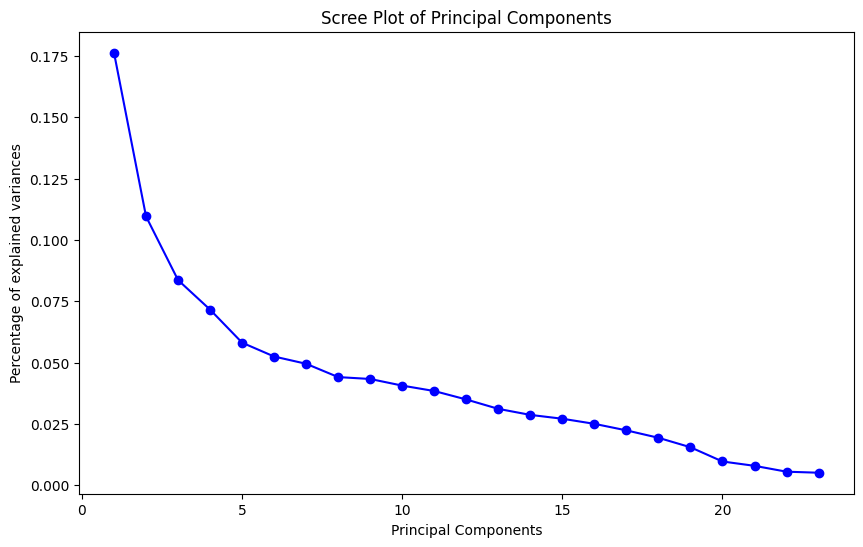

                                     feature    PC   loading
interference                    interference   PC1  0.400276
superposition                  superposition   PC1  0.381487
hilbert space                  hilbert space   PC1  0.377485
operator                            operator   PC1  0.294032
uncertainty                      uncertainty   PC1  0.285422
...                                      ...   ...       ...
observer effect              observer effect  PC23  0.776593
exclusion principle      exclusion principle  PC23 -0.602982
wave-particle duality  wave-particle duality  PC23 -0.135767
tunneling                          tunneling  PC23  0.076495
measurement problem      measurement problem  PC23  0.065692

[115 rows x 3 columns]
                         feature   PC   loading
interference        interference  PC1  0.400276
superposition      superposition  PC1  0.381487
hilbert space      hilbert space  PC1  0.377485
operator                operator  PC1  0.294032
unce

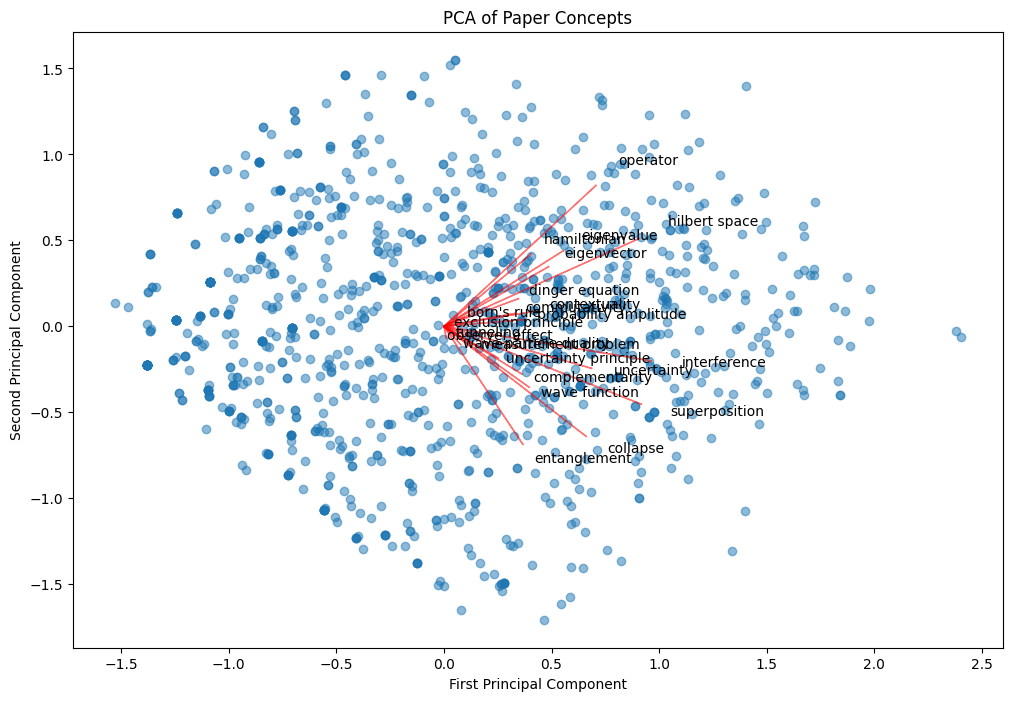

,feature,PC,loading
interference,interference,PC1,0.400276
superposition,superposition,PC1,0.381487
hilbert space,hilbert space,PC1,0.377485
operator,operator,PC1,0.294032
uncertainty,uncertainty,PC1,0.285422
operator,operator,PC2,0.479930
hilbert space,hilbert space,PC2,0.299079
superposition,superposition,PC2,-0.264939
collapse,collapse,PC2,-0.374239
entanglement,entanglement,PC2,-0.401780


In [282]:
pca = PCA()
pca_result = pca.fit_transform(features)
print("Explained variance ratio:", pca.explained_variance_ratio_[:5])

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of explained variances')
plt.show()

# Feature importance in components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

# Top 5 features per component
top_loadings = pd.DataFrame()
for pc in loadings.columns:
    top_5 = pd.DataFrame({
        'feature': loadings.index,
        'PC': pc,
        'loading': loadings[pc]
    })

    top_5 = top_5.reindex(top_5['loading'].abs().sort_values(ascending=False).index)
    top_5 = top_5.head(5)
    top_loadings = pd.concat([top_loadings, top_5])

print(top_loadings)

# PC1 and 2
pc12_loadings = top_loadings[top_loadings['PC'].isin(['PC1', 'PC2', 'PC3', 'PC4'])]
pc12_loadings = pc12_loadings.sort_values(['PC', 'loading'],
                                         ascending=[True, False])
print(pc12_loadings)

# PCA biplot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

for i, feature in enumerate(features.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*max(abs(pca_result[:, 0])),
              pca.components_[1, i]*max(abs(pca_result[:, 1])),
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(abs(pca_result[:, 0]))*1.15,
             pca.components_[1, i]*max(abs(pca_result[:, 1]))*1.15,
             feature)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Paper Concepts')
plt.show()
display(pc12_loadings)

# K-means cluster analysis

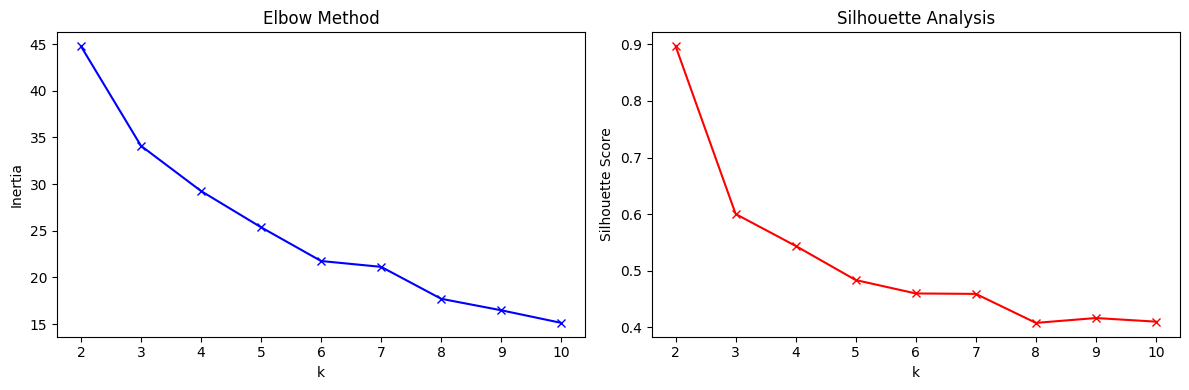

In [208]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def optimize_kmeans(data, max_clusters=10):
    silhouette_scores = []
    inertias = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
        inertias.append(kmeans.inertia_)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(range(2, max_clusters + 1), inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')

    ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    return silhouette_scores, inertias

# Use on your data
scores, inertias = optimize_kmeans(pca_result[:, :4])

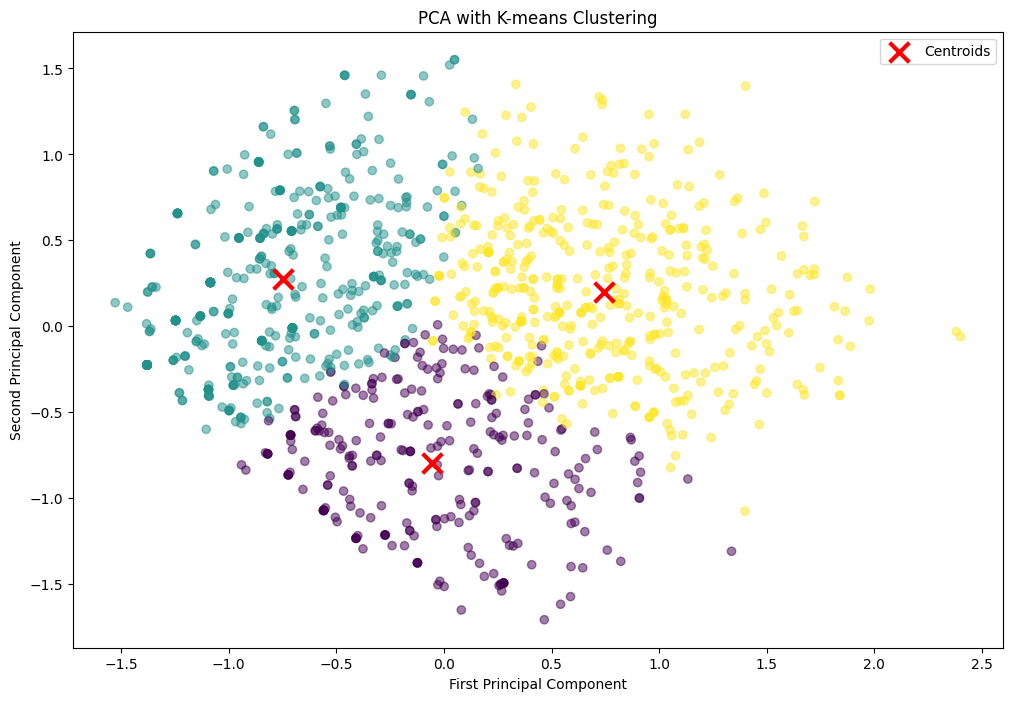

In [172]:
# Key parameters to alter
######################
n_clusters = 3 # number of clusters
kmeans = KMeans(n_clusters=n_clusters,
                random_state=42)
cluster_labels = kmeans.fit_predict(pca_result[:, :5]) # number of dimensions in the analysis

# Get the centroids
centroid_coords = kmeans.cluster_centers_

# Function to get top papers for each centroid
def get_top_papers(centroid_coord, pca_data, df, cluster_num, n_top=10): # number of central papers to extarct
    distances = np.sum((pca_data - centroid_coord)**2, axis=1)
    top_indices = np.argsort(distances)[:n_top]
    return pd.DataFrame({
        'cluster': [cluster_num + 1] * n_top,
        'rank': range(1, n_top + 1),
        'centroid_id': df['id'].iloc[top_indices].values,
        'distance': distances[top_indices]
    })

# Get top papers for each centroid
centroids_list = []
for i in range(n_clusters):
    cluster_papers = get_top_papers(centroid_coords[i], pca_result[:, :5], df, i) # here as well number of dimensions in the analysis
    centroids_list.append(cluster_papers)

centroids = pd.concat(centroids_list, ignore_index=True)

centerpapers = pd.merge(centroids, metadata, left_on='centroid_id', right_on='id', how='left')
centerpapers.to_csv('center_papers_means.csv', index=False)

# Viz
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with K-means Clustering')
plt.legend()
plt.show()

# K-medoids cluster analysis

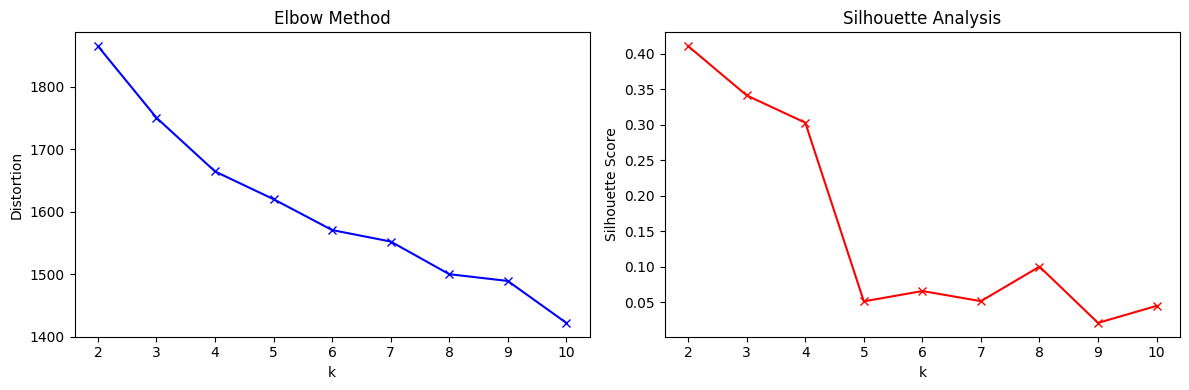

In [245]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_clusters=10):
    # Store results
    silhouette_scores = []
    distortions = []

    # Try different numbers of clusters
    for k in range(2, max_clusters + 1):
        # Initialize and fit KMedoids
        pam = KMedoids(n_clusters=k,
                       random_state=42,
                       metric='euclidean',
                       method='alternate')

        # Fit the model and get labels
        labels = pam.fit_predict(data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

        # Calculate distortion (within-cluster sum of squares)
        distortions.append(pam.inertia_)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Elbow plot
    ax1.plot(range(2, max_clusters + 1), distortions, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Distortion')
    ax1.set_title('Elbow Method')

    # Silhouette plot
    ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    return silhouette_scores, distortions

# Use on your data
scores, distortions = find_optimal_clusters(pca_result[:, :5])

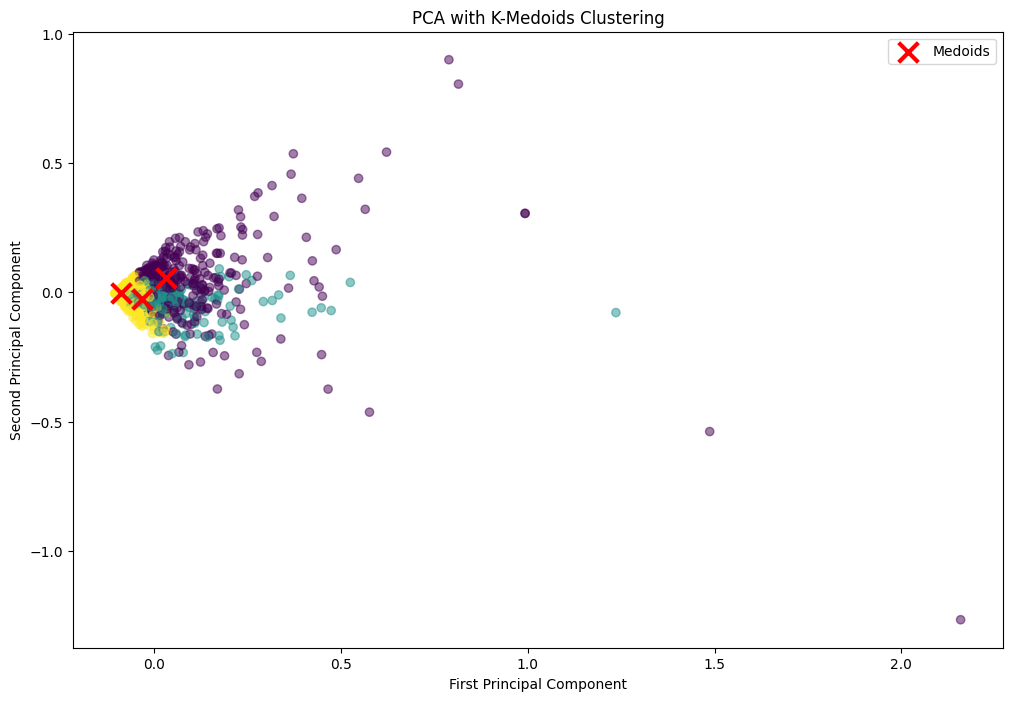

In [126]:
# Key parameters to alter
######################
n_clusters = 3 # number of clusters
pam = KMedoids(n_clusters=n_clusters,
               random_state=42,
               metric='euclidean',
               method='alternate')
cluster_labels = pam.fit_predict(pca_result[:, :5]) # number of dimensions in the analysis

# Get the medoid coordinates
medoid_indices = pam.medoid_indices_
medoid_coords = pca_result[medoid_indices, :5] # here as well number of dimensions in the analysis

# Function to get top papers for each centroid
def get_top_papers(centroid_coord, pca_data, df, n_top=10): # number of central papers to extarct
    distances = np.sum((pca_data - centroid_coord)**2, axis=1)
    top_indices = np.argsort(distances)[:n_top]
    return pd.DataFrame({
        'cluster': [pam.medoid_indices_.tolist().index(medoid_indices[i]) + 1] * n_top,
        'rank': range(1, n_top + 1),
        'centroid_id': df['id'].iloc[top_indices].values,
        'distance': distances[top_indices]
    })

# Get top papers for each centroid
centroids_list = []
for i, medoid_coord in enumerate(medoid_coords):
    cluster_papers = get_top_papers(medoid_coord, pca_result[:, :5], df)
    centroids_list.append(cluster_papers)

centroids = pd.concat(centroids_list, ignore_index=True)

centerpapers = pd.merge(centroids, metadata, left_on='centroid_id', right_on='id', how='left')
centerpapers.to_csv('center_papers_medoids.csv', index=False)

# Viz
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Plot medoids instead of kmeans centroids
plt.scatter(pca_result[medoid_indices, 0], pca_result[medoid_indices, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with K-Medoids Clustering')
plt.legend()
plt.show()

# Overlap of clusters
only limited use for now, but this should be extendable to anything else

In [89]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

# Binary K-means



In [283]:
n_clusters = 3
dims = [2, 3, 4, 5, 10]
b3means2, b3means3,b3means4, b3means5, b3means10 = [
    KMeans(n_clusters=n_clusters, random_state=42).fit_predict(pca_result[:, :d])
    for d in dims
]

In [284]:
import numpy as np

labels_dict = {
    '2 dims': b3means2,
    '3 dims': b3means3,
    '4 dims': b3means4,
    '5 dims': b3means5,
    '10 dims': b3means10
}

n = len(labels_dict)
ari_matrix = pd.DataFrame(np.zeros((n, n)),
                         columns=labels_dict.keys(),
                         index=labels_dict.keys())

for i in labels_dict.keys():
    for j in labels_dict.keys():
        ari = adjusted_rand_score(labels_dict[i], labels_dict[j])
        ari_matrix.loc[i,j] = round(ari, 3)

print("Adjusted Rand Index Scores between different dimensionalities:")
print(ari_matrix)

# ARI goes from -1 to 1 and measures the similarity between 2 clustering mechanisms

Adjusted Rand Index Scores between different dimensionalities:
         2 dims  3 dims  4 dims  5 dims  10 dims
2 dims    1.000   0.880   0.841   0.871    0.476
3 dims    0.880   1.000   0.952   0.954    0.462
4 dims    0.841   0.952   1.000   0.933    0.449
5 dims    0.871   0.954   0.933   1.000    0.476
10 dims   0.476   0.462   0.449   0.476    1.000


# Z-Score K-means

In [279]:
n_clusters = 3
dims = [2, 3, 4, 5, 10]
z3means2, z3means3,z3means4, z3means5, z3means10 = [
    KMeans(n_clusters=n_clusters, random_state=42).fit_predict(pca_result[:, :d])
    for d in dims
]

In [280]:
import numpy as np

labels_dict = {
    '2 dims': z3means2,
    '3 dims': z3means3,
    '4 dims': z3means4,
    '5 dims': z3means5,
    '10 dims': z3means10
}

n = len(labels_dict)
ari_matrix = pd.DataFrame(np.zeros((n, n)),
                         columns=labels_dict.keys(),
                         index=labels_dict.keys())

for i in labels_dict.keys():
    for j in labels_dict.keys():
        ari = adjusted_rand_score(labels_dict[i], labels_dict[j])
        ari_matrix.loc[i,j] = round(ari, 3)

print("Adjusted Rand Index Scores between different dimensionalities:")
print(ari_matrix)

Adjusted Rand Index Scores between different dimensionalities:
         2 dims  3 dims  4 dims  5 dims  10 dims
2 dims    1.000   0.804   0.908   0.784    0.776
3 dims    0.804   1.000   0.849   0.648    0.687
4 dims    0.908   0.849   1.000   0.749    0.748
5 dims    0.784   0.648   0.749   1.000    0.828
10 dims   0.776   0.687   0.748   0.828    1.000


# MinMax K-Means

In [275]:
n_clusters = 3
dims = [2, 3, 4, 5, 10]
m3means2, m3means3,m3means4, m3means5, m3means10 = [
    KMeans(n_clusters=n_clusters, random_state=42).fit_predict(pca_result[:, :d])
    for d in dims
]

In [276]:
import numpy as np

labels_dict = {
    '2 dims': m3means2,
    '3 dims': m3means3,
    '4 dims': m3means4,
    '5 dims': m3means5,
    '10 dims': m3means10
}

n = len(labels_dict)
ari_matrix = pd.DataFrame(np.zeros((n, n)),
                         columns=labels_dict.keys(),
                         index=labels_dict.keys())

for i in labels_dict.keys():
    for j in labels_dict.keys():
        ari = adjusted_rand_score(labels_dict[i], labels_dict[j])
        ari_matrix.loc[i,j] = round(ari, 3)

print("Adjusted Rand Index Scores between different dimensionalities:")
print(ari_matrix)

Adjusted Rand Index Scores between different dimensionalities:
         2 dims  3 dims  4 dims  5 dims  10 dims
2 dims    1.000   0.538   0.759   0.798    0.777
3 dims    0.538   1.000   0.684   0.581    0.678
4 dims    0.759   0.684   1.000   0.842    0.968
5 dims    0.798   0.581   0.842   1.000    0.844
10 dims   0.777   0.678   0.968   0.844    1.000


In [242]:
from IPython.display import display
display(ari_matrix)

,2 dims,3 dims,4 dims,5 dims,10 dims
2 dims,1.000,0.398,0.856,0.146,0.106
3 dims,0.398,1.000,0.498,0.038,0.027
4 dims,0.856,0.498,1.000,0.111,0.080
5 dims,0.146,0.038,0.111,1.000,0.826
10 dims,0.106,0.027,0.080,0.826,1.000


# Z-score K-Medoids

In [237]:
n_clusters = 2
dims = [2, 3, 4, 5, 10]
z3medoids2, z3medoids3, z3medoids4, z3medoids5, z3medoids10 = [
    KMedoids(n_clusters=n_clusters, random_state=42, metric='euclidean',
             method='alternate').fit_predict(pca_result[:, :d])
    for d in dims
]

In [238]:
import numpy as np

labels_dict = {
    '2 dims': z3medoids2,
    '3 dims': z3medoids3,
    '4 dims': z3medoids4,
    '5 dims': z3medoids5,
    '10 dims': z3medoids10
}

n = len(labels_dict)
ari_matrix = pd.DataFrame(np.zeros((n, n)),
                         columns=labels_dict.keys(),
                         index=labels_dict.keys())

for i in labels_dict.keys():
    for j in labels_dict.keys():
        ari = adjusted_rand_score(labels_dict[i], labels_dict[j])
        ari_matrix.loc[i,j] = round(ari, 3)

print("Adjusted Rand Index Scores between different dimensionalities:")
print(ari_matrix)

Adjusted Rand Index Scores between different dimensionalities:
         2 dims  3 dims  4 dims  5 dims  10 dims
2 dims    1.000   0.463   0.730   0.632    0.354
3 dims    0.463   1.000   0.458   0.388    0.469
4 dims    0.730   0.458   1.000   0.554    0.369
5 dims    0.632   0.388   0.554   1.000    0.372
10 dims   0.354   0.469   0.369   0.372    1.000


In [239]:
from IPython.display import display
display(ari_matrix)

,2 dims,3 dims,4 dims,5 dims,10 dims
2 dims,1.000,0.463,0.730,0.632,0.354
3 dims,0.463,1.000,0.458,0.388,0.469
4 dims,0.730,0.458,1.000,0.554,0.369
5 dims,0.632,0.388,0.554,1.000,0.372
10 dims,0.354,0.469,0.369,0.372,1.000


# Comparing Kmeans and Kmedoids


In [285]:
# Compare each dimensionality pair
comparisons = {
   '2 dims': adjusted_rand_score(z3means2, b3means2),
   '3 dims': adjusted_rand_score(z3means3, b3means3),
   '4 dims': adjusted_rand_score(z3means4, b3means4),
   '5 dims': adjusted_rand_score(z3means5, b3means5),
   '10 dims': adjusted_rand_score(z3means10, b3means10)
}

# Create DataFrame
comparison_df = pd.DataFrame.from_dict(comparisons, orient='index', columns=['ARI Score'])
print("KMeans vs KMedoids comparison at different dimensions:")
print(comparison_df)

KMeans vs KMedoids comparison at different dimensions:
         ARI Score
2 dims    0.017464
3 dims    0.003694
4 dims    0.007661
5 dims    0.026209
10 dims   0.089356


In [287]:
# Compare each dimensionality pair
comparisons = {
   '2 dims': adjusted_rand_score(m3means2, b3means2),
   '3 dims': adjusted_rand_score(m3means3, b3means3),
   '4 dims': adjusted_rand_score(m3means4, b3means4),
   '5 dims': adjusted_rand_score(m3means5, b3means5),
   '10 dims': adjusted_rand_score(m3means10, b3means10)
}

# Create DataFrame
comparison_df = pd.DataFrame.from_dict(comparisons, orient='index', columns=['ARI Score'])
print("KMeans vs KMedoids comparison at different dimensions:")
print(comparison_df)

KMeans vs KMedoids comparison at different dimensions:
         ARI Score
2 dims    0.040789
3 dims    0.006966
4 dims    0.017969
5 dims    0.028403
10 dims   0.066180


In [289]:
# Compare each dimensionality pair
comparisons = {
   '2 dims': adjusted_rand_score(m3means2, z3means2),
   '3 dims': adjusted_rand_score(m3means3, z3means3),
   '4 dims': adjusted_rand_score(m3means4, z3means4),
   '5 dims': adjusted_rand_score(m3means5, z3means5),
   '10 dims': adjusted_rand_score(m3means10, z3means10)
}

# Create DataFrame
comparison_df = pd.DataFrame.from_dict(comparisons, orient='index', columns=['ARI Score'])
print("KMeans vs KMedoids comparison at different dimensions:")
print(comparison_df)

KMeans vs KMedoids comparison at different dimensions:
         ARI Score
2 dims    0.599007
3 dims    0.610429
4 dims    0.621733
5 dims    0.719408
10 dims   0.680496


In [290]:
from IPython.display import display
display(comparison_df)

,ARI Score
2 dims,0.599007
3 dims,0.610429
4 dims,0.621733
5 dims,0.719408
10 dims,0.680496
